In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Problem Statement

Predicting weekly sales price of different stores of walmart using different attributes as -
  

*   store-  the store number
*   Date - the week of sales


*   Weekly_Sales(Target variable) - sales for the given store

*   Holiday_Flag - whether the week is a special holiday week. 1 - Holiday week  
   0 -Non-holiday week

*   Temperature - Temperature on the day of sale
*   Fuel_Price - Cost of fuel in the region


*   CPI -  Prevailing consumer price index


*   Unemployment - Prevailing unemployment rate

## Import all required libraries

In [3]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

# import required data

In [4]:
walmart = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Walmart-regression_analysis/Walmart.csv')

In [5]:
walmart.shape

(6435, 8)

In [6]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
walmart.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [8]:
walmart.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6069,43,22-04-2011,638280.67,0,74.49,3.807,207.258193,10.581
4072,29,27-05-2011,550735.64,0,62.59,4.034,134.767774,9.966
1776,13,01-04-2011,1864238.64,0,42.49,3.487,128.719935,7.193
1279,9,07-09-2012,565812.29,1,87.93,3.730,226.210354,5.277
4414,31,22-06-2012,1394065.76,0,81.78,3.346,221.441162,6.891


In [9]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
walmart.describe(include = 'all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


# EDA and Preprocessing

In [11]:
# convert the date to week, month and year format
walmart['Date'] = pd.to_datetime(walmart['Date'], format='%d-%m-%Y')
walmart['Week'] = walmart['Date'].dt.week
walmart['Month'] = walmart['Date'].dt.month
walmart['Year']  = walmart['Date'].dt.year
walmart.drop('Date',axis=1,inplace=True)
walmart.head()

<ipython-input-11-89f89c7f44e1>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  walmart['Week'] = walmart['Date'].dt.week


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,6,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,9,3,2010


In [12]:
walmart.nunique()

Store             45
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Week              52
Month             12
Year               3
dtype: int64

In [13]:
num_var = ['Weekly_Sales','Temperature','Fuel_Price', 'CPI','Unemployment']

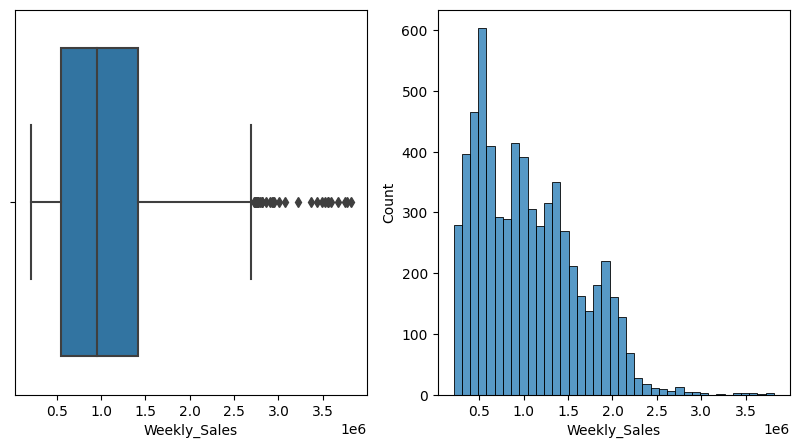

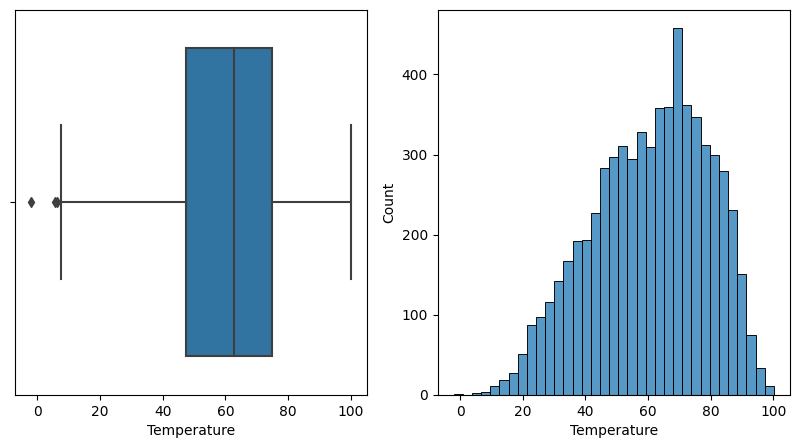

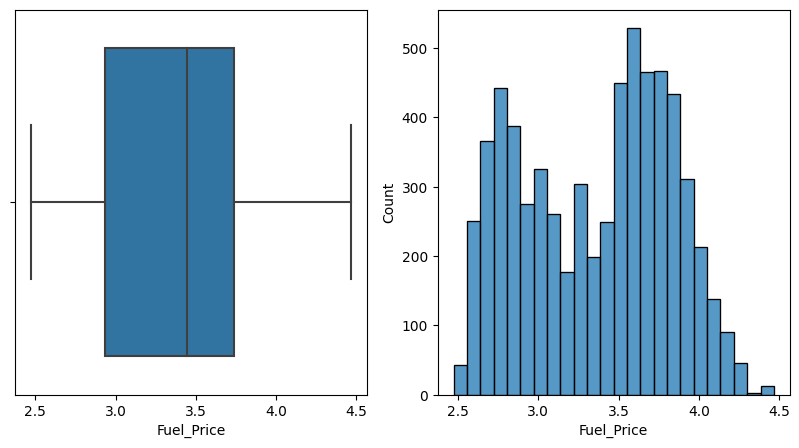

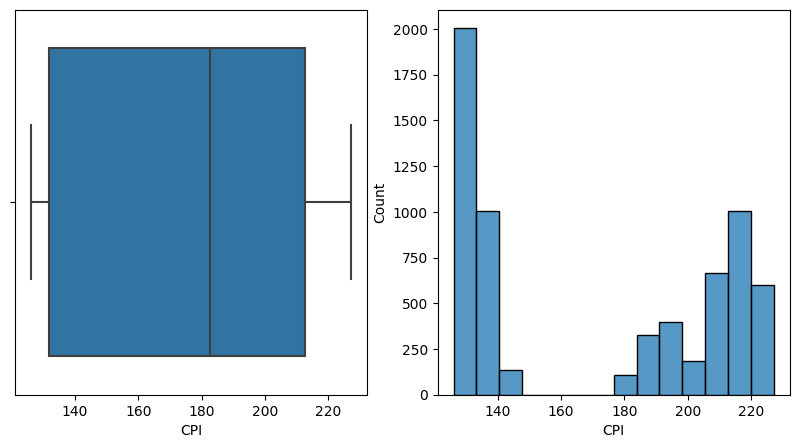

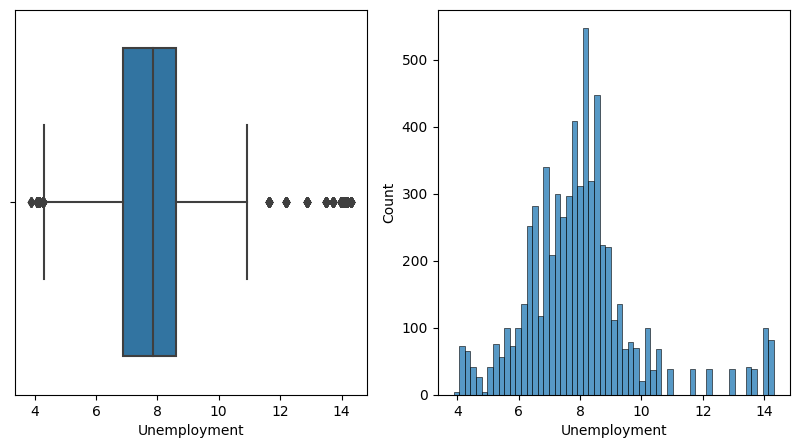

In [14]:
# checking for outliers
for col in num_var:
    fig, ax =plt.subplots(1,2, figsize=(10,5))
    sns.boxplot(data=walmart, x=col, ax=ax[0])
    sns.histplot(walmart, x=col,ax=ax[1])
    plt.show()

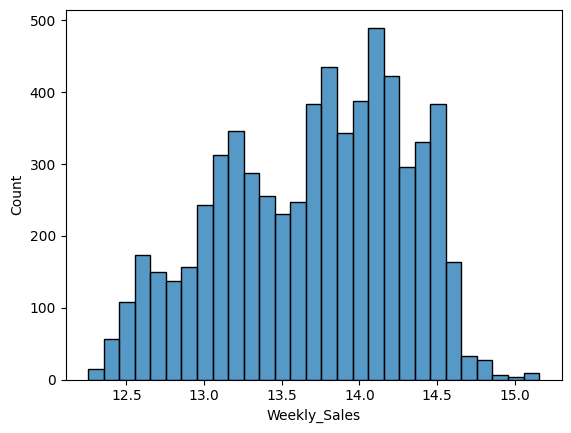

In [15]:
## let's transform the target using the logarithm
x = np.log(walmart['Weekly_Sales'])
sns.histplot(x)
plt.show()

In [17]:
# remove one outlier of temperature
walmart[walmart['Temperature']< 5]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Year
910,7,558027.77,0,-2.06,3.011,191.762589,8.818,5,2,2011


In [18]:
# drop the row with outlier of temperature
walmart = walmart[walmart['Temperature']>= 5]
walmart.shape

(6434, 10)

Text(0.5, 1.0, 'weekly sales per store')

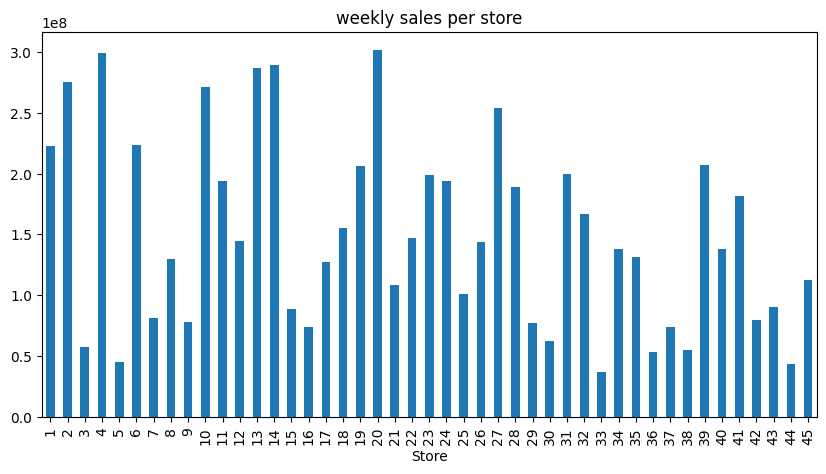

In [19]:
# weekly sales of different stores
plt.figure(figsize = (10,5))
walmart.groupby(['Store'])['Weekly_Sales'].sum().plot(kind = 'bar')
plt.title('weekly sales per store')

In [ ]:
# Total sale on holidays
fig, ax =plt.subplots(1,2, figsize=(15,5))
holiday_sale = walmart.groupby(['Holiday_Flag'])['Weekly_Sales'].sum()
sns.countplot(data = walmart, x = 'Holiday_Flag', ax = ax[0])
ax[1].pie(holiday_sale, labels = ('non-holiday week', 'holiday week'),  autopct='%1.1f%%')
plt.title('weekly sales on holiday')
plt.show()

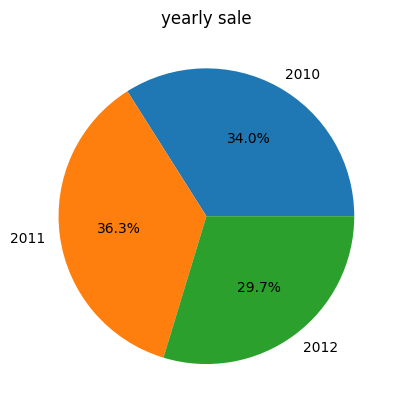

In [20]:
# total sale on year basis
yearly_sale = walmart.groupby(['Year'])['Weekly_Sales'].sum()
plt.pie(yearly_sale, autopct='%1.1f%%', labels = ('2010', '2011', '2012'))
plt.title('yearly sale')
plt.show()

In [21]:
walmart['Year'].value_counts()

2011    2339
2010    2160
2012    1935
Name: Year, dtype: int64

In [22]:

weekly_sale_2010 = walmart[walmart['Year'] == 2010]
weekly_sale_2011 = walmart[walmart['Year'] == 2011]
weekly_sale_2012 = walmart[walmart['Year'] == 2012]

In [23]:
print(weekly_sale_2012.shape)

(1935, 10)


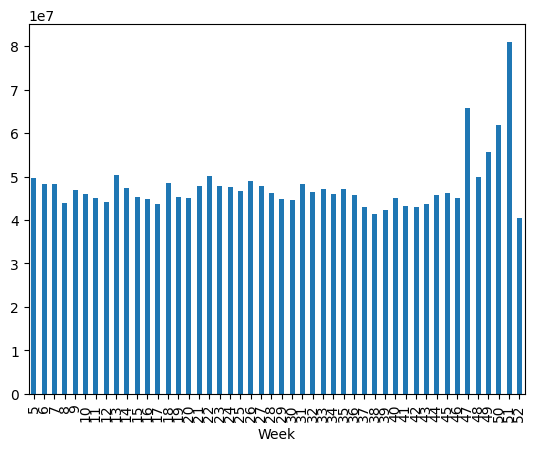

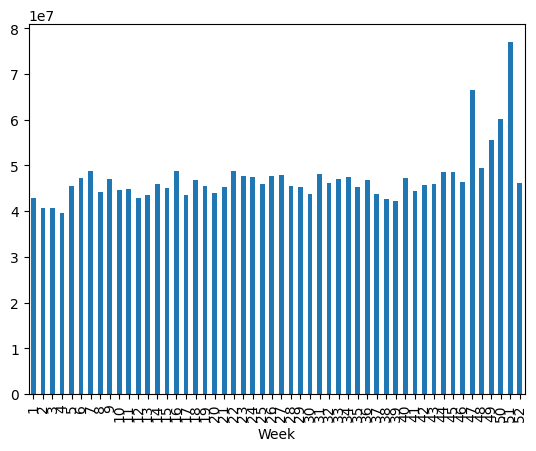

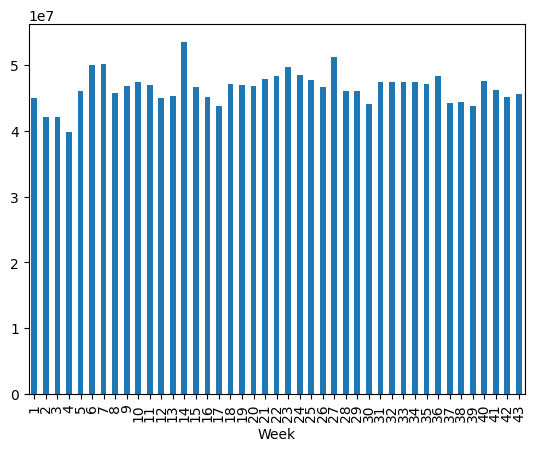

In [24]:
for i in [weekly_sale_2010, weekly_sale_2011, weekly_sale_2012]:
  i.groupby(['Week'])['Weekly_Sales'].sum().plot(kind = 'bar')
  plt.show()

In [ ]:
#null values
walmart.isna().sum()

In [26]:
# Duplicated values
walmart.duplicated().sum()

0

<Axes: >

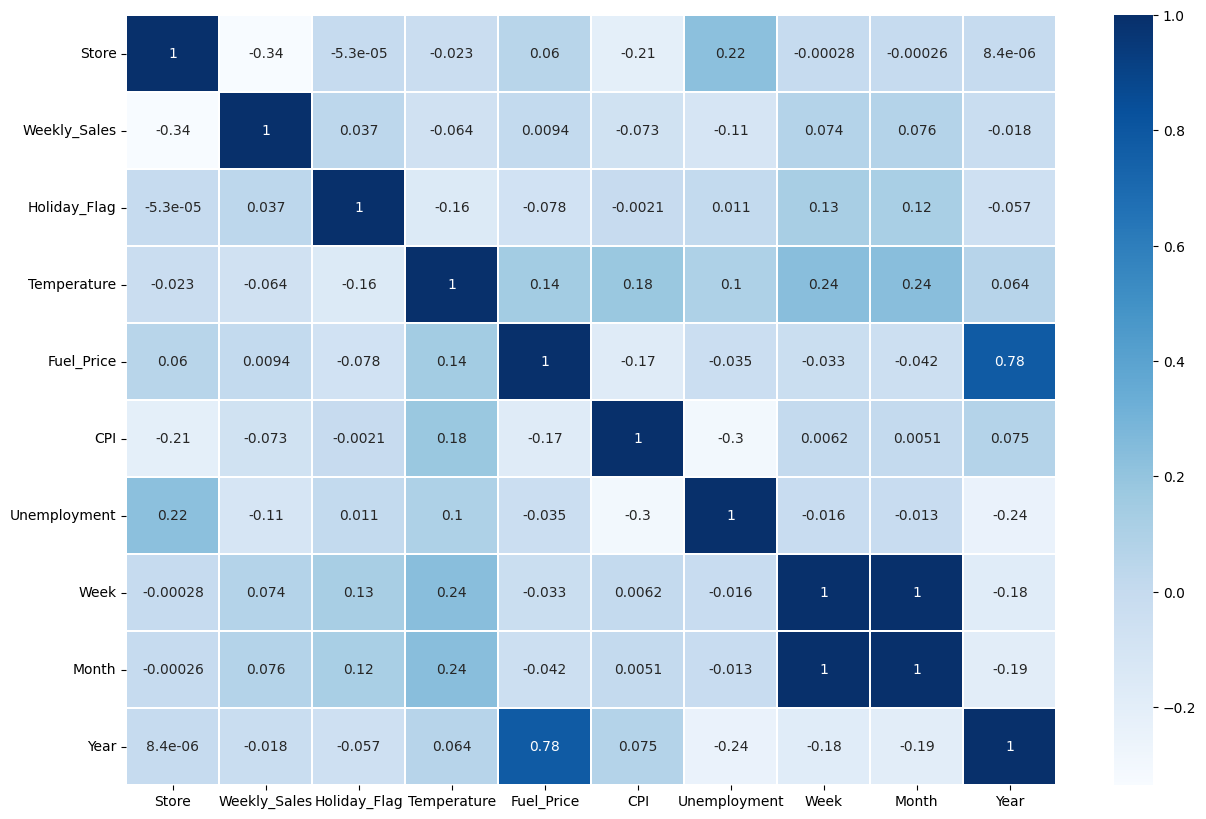

In [27]:
# Correlation
plt.figure(figsize = (15,10))
sns.heatmap(walmart.corr(), annot=True, cmap='Blues', linewidths=0.1)

In [28]:
walmart_corr = abs(walmart.corr())['Weekly_Sales']
walmart_corr.sort_values(ascending = False)

Weekly_Sales    1.000000
Store           0.335557
Unemployment    0.106125
Month           0.075974
Week            0.074030
CPI             0.072571
Temperature     0.064330
Holiday_Flag    0.036856
Year            0.018373
Fuel_Price      0.009363
Name: Weekly_Sales, dtype: float64

# Train-Test split

In [29]:
X = walmart.drop(['Weekly_Sales'], axis = 1)
y = walmart['Weekly_Sales']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4503, 9)
(1931, 9)
(4503,)
(1931,)


# Log transformation

In [32]:
y_train = np.log(y_train)
y_test = np.log(y_test)

# Standard Scaling

In [33]:
s_t = StandardScaler()
s_t.fit(X)

StandardScaler()

In [34]:
X_train = s_t.transform(X_train)
X_test = s_t.transform(X_test)

# Model Building

In [35]:
def eval_metric(train_pred, test_pred, y_train, y_test):
  print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
  print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

  print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
  print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

  print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
  print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

  print("The r2 scorce on train dataset: {} \n".format(r2_score(y_pred=train_pred,y_true=y_train)))
  print("The r2 scorce on test dataset: {} \n".format(r2_score(y_pred=test_pred,y_true=y_test)))


## Linear Regression

In [36]:
LR = LinearRegression()

LR.fit(X_train, y_train)

lr_train_pred = LR.predict(X_train)
lr_test_pred = LR.predict(X_test)

eval_metric(np.exp(lr_train_pred), np.exp(lr_test_pred), np.exp(y_train), np.exp(y_test))

The Mean Absolute Error on train dataset: 435170.45811566984 

The Mean Absolute Error on test dataset: 425046.9138153067 

The Mean Squared Error on train dataset: 293122353770.7452 

The Mean Squared Error on test dataset: 276847266438.3389 

The Root Mean Squared Error on train dataset: 541407.7518569024 

The Root Mean Squared Error on test dataset: 526162.775610684 

The r2 scorce on train dataset: 0.09554456796209254 

The r2 scorce on test dataset: 0.09302157791813459 



## SVM

In [37]:
svm = SVR()

svm.fit(X_train, y_train)

s_train_pred = svm.predict(X_train)
s_test_pred = svm.predict(X_test)


eval_metric(np.exp(s_train_pred), np.exp(s_test_pred), np.exp(y_train), np.exp(y_test))

The Mean Absolute Error on train dataset: 295588.7666166875 

The Mean Absolute Error on test dataset: 306681.2365549179 

The Mean Squared Error on train dataset: 176711711803.59943 

The Mean Squared Error on test dataset: 185186305084.7906 

The Root Mean Squared Error on train dataset: 420370.92169130757 

The Root Mean Squared Error on test dataset: 430332.7841157243 

The r2 scorce on train dataset: 0.45474009201466026 

The r2 scorce on test dataset: 0.39331175294669796 



## Decision Tree

In [38]:
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

eval_metric(np.exp(dt_train_pred), np.exp(dt_test_pred), np.exp(y_train), np.exp(y_test))

The Mean Absolute Error on train dataset: 0.0 

The Mean Absolute Error on test dataset: 78771.15856033139 

The Mean Squared Error on train dataset: 0.0 

The Mean Squared Error on test dataset: 23591076004.884155 

The Root Mean Squared Error on train dataset: 0.0 

The Root Mean Squared Error on test dataset: 153593.8670809618 

The r2 scorce on train dataset: 1.0 

The r2 scorce on test dataset: 0.9227133532312165 



## K Nearest Neighbour

In [39]:
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

eval_metric(np.exp(knn_train_pred), np.exp(knn_test_pred), np.exp(y_train), np.exp(y_test))

The Mean Absolute Error on train dataset: 205724.44534559528 

The Mean Absolute Error on test dataset: 259881.6863529688 

The Mean Squared Error on train dataset: 103727057930.321 

The Mean Squared Error on test dataset: 146710123689.27844 

The Root Mean Squared Error on train dataset: 322066.8532002649 

The Root Mean Squared Error on test dataset: 383027.57562514796 

The r2 scorce on train dataset: 0.6799408172473784 

The r2 scorce on test dataset: 0.5193634446928027 



## Random forest

In [40]:
rn = RandomForestRegressor()

rn.fit(X_train, y_train)

rn_train_pred = rn.predict(X_train)
rn_test_pred = rn.predict(X_test)

eval_metric(np.exp(rn_train_pred), np.exp(rn_test_pred), np.exp(y_train), np.exp(y_test))

The Mean Absolute Error on train dataset: 23392.959275486766 

The Mean Absolute Error on test dataset: 58361.4411803326 

The Mean Squared Error on train dataset: 2069896604.1707933 

The Mean Squared Error on test dataset: 11094700113.831783 

The Root Mean Squared Error on train dataset: 45496.116363606176 

The Root Mean Squared Error on test dataset: 105331.38237881332 

The r2 scorce on train dataset: 0.9936131475361196 

The r2 scorce on test dataset: 0.9636526893251596 



## Gradient Boost

In [41]:
gb = GradientBoostingRegressor()

gb.fit(X_train, y_train)

gb_train_pred = gb.predict(X_train)
gb_test_pred = gb.predict(X_test)

eval_metric(np.exp(gb_train_pred), np.exp(gb_test_pred), np.exp(y_train), np.exp(y_test))

The Mean Absolute Error on train dataset: 137282.88393651583 

The Mean Absolute Error on test dataset: 137855.33922929494 

The Mean Squared Error on train dataset: 41566942474.32166 

The Mean Squared Error on test dataset: 39446553136.2288 

The Root Mean Squared Error on train dataset: 203879.72551070806 

The Root Mean Squared Error on test dataset: 198611.5634504416 

The r2 scorce on train dataset: 0.8717414539339046 

The r2 scorce on test dataset: 0.8707692765749819 

